# Results  and visualisation


## Imports


In [11]:
import numpy as np 
import pandas as pd
import json
from Utils import load_json_file
import os
results_path = 'Results'
import h5py
import matplotlib.pyplot as plt
import seaborn as sns


## Helper Functions

In [9]:
def create_video_perf_dataframe(data_path):
    list_of_performances = []
    for i in range(1,6):
        result_path_corr = os.path.join(data_path,'Correlation',f'split_{i}_noname.json')
        list_of_performances.append(pd.DataFrame.from_dict(load_json_file(result_path_corr),orient='index'))
    return pd.concat(list_of_performances).sort_index()
def compute_avg_over_all_splits(expt_name,model,dataset):
    result_list = [pd.DataFrame(load_json_file(os.path.join(results_path,expt_name+f"_{i}",f"best_corr\\{dataset}",model,"Correlation/results.json"))) for i in range(1,4)]
    result_list = [ result['Overall Kendall'][0] for result in result_list]
    return np.mean(result_list)



def compute_avg_individual_splits(expt_name,model,dataset):
    list_of_result_paths = [(os.path.join(results_path,expt_name+f"_{i}",f"best_corr\\{dataset}",model)) for i in range(1,4)]
    performance_list = []
    for result_path in list_of_result_paths:
        performance_list.append(create_video_perf_dataframe(result_path))
    
    performance_list = pd.concat(performance_list)
    by_row_index  = performance_list.groupby(performance_list.index)
    df_means = by_row_index.mean()
    return df_means


def cosine_2(v,w):
    return np.dot(v, w.T) / np.outer(np.linalg.norm(v,axis=1),np.linalg.norm(w,axis=1))

def visualise_pred_diffs(score):
    visualised_relative_importances = np.zeros((score.shape[0],score.shape[0]))

    for i in range(0,visualised_relative_importances.shape[0]):
        visualised_relative_importances[i,i] = 0
        visualised_relative_importances[i,i+1:] = np.abs(score[i+1:] - score[i])
    visualised_relative_importances += visualised_relative_importances.T
    return visualised_relative_importances




## Visualization of the Heatmaps of frame similarity vs Ground truth scores 

Each video can be seen for their relationship b/w the ground truth and the framewise similarity. Uncomment the dataset that needs to be used for your analysis

In [13]:
data_h5 = h5py.File(os.path.join('Data\\h5datasets','eccv16_dataset_tvsum_google_pool5'+'.h5'),'r')
#data_h5 = h5py.File(os.path.join('Data\\h5datasets','eccv16_dataset_summe_google_pool5'+'.h5'),'r')
index_in_question = 'video_35'
user_summary = data_h5[index_in_question]['user_summary'][...]
ground_truth = data_h5[index_in_question]['gtscore'][...]
features = data_h5[index_in_question]['features'][...]
ground_truth /=ground_truth.max() 
ground_truth-=ground_truth.min()
vector_cosine = cosine_2(features,features)
visualised_relative_importances = visualise_pred_diffs(ground_truth)



### Importance score heatmap

[Text(0.5, 36.72222222222221, 'Frame Index'),
 Text(83.22222222222221, 0.5, 'Frame Index')]

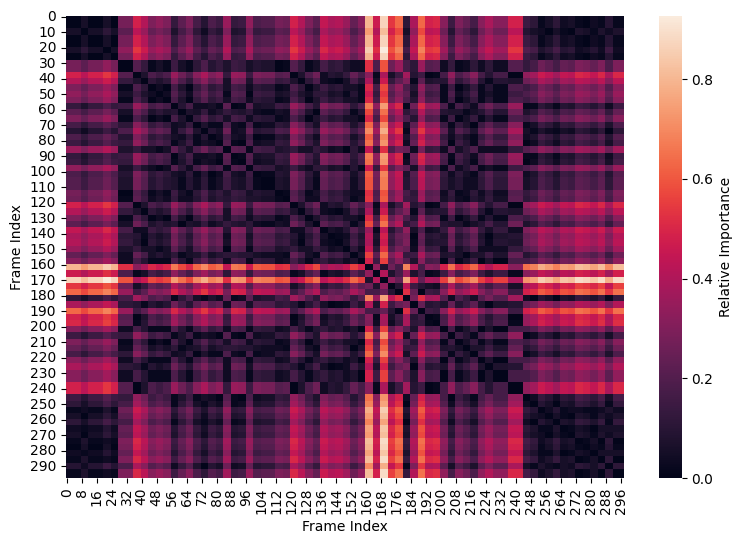

In [14]:
plt.figure(figsize=(9,6))
ax = sns.heatmap(visualised_relative_importances, cbar_kws={'label': 'Relative Importance'} )
ax.set(xlabel="Frame Index", ylabel="Frame Index")

### Cosine Similarity Heatmap

[Text(0.5, 36.72222222222221, 'Frame Index'),
 Text(83.22222222222221, 0.5, 'Frame Index')]

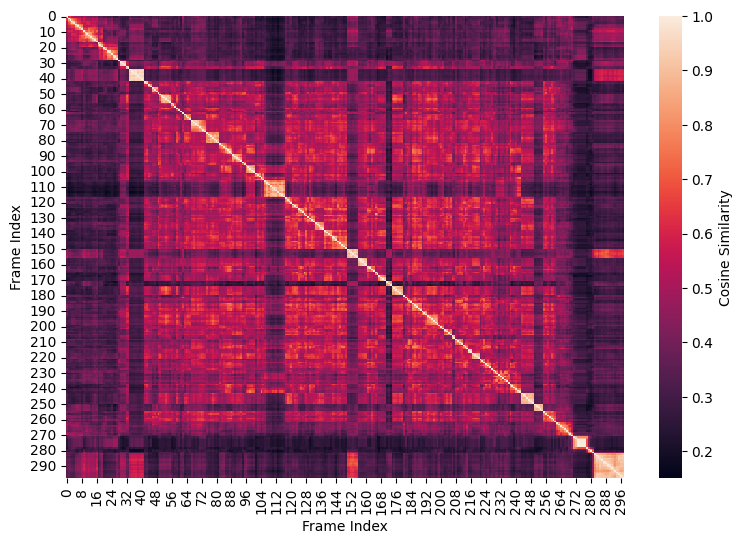

In [15]:
plt.figure(figsize=(9,6))
vector_cosine = cosine_2(features,features)
ax = sns.heatmap(vector_cosine, cbar_kws={'label': 'Cosine Similarity'})
ax.set(xlabel="Frame Index", ylabel="Frame Index")

# Result analysis

The resuls of a run can be displayed by taking the run name in question used in the configuration

In [10]:
data_type = 'can'
run_name = f"Baseline_{data_type}"
model = 'PGL_SUM'
overall_results = compute_avg_over_all_splits(run_name,model,'tvsum')
video_level_average_results = compute_avg_individual_splits(run_name,model,'tvsum')

### Average over all three splits

In [17]:
print(f'Average kendall results: {overall_results}')

Average kendall results: 0.17457689801388154


In [18]:
video_level_average_results

,kendall,spearman
video_1,0.266720,0.351379
video_10,0.071006,0.095308
video_11,0.195872,0.259360
video_12,0.275404,0.361203
video_13,0.173531,0.226638
video_14,0.293975,0.385452
video_15,0.260586,0.338990
video_16,0.146298,0.191728
video_17,0.215242,0.281468
video_18,0.287911,0.379649
